<a href="https://colab.research.google.com/github/JvSecate/PDI/blob/main/Atividades/Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Atividades - Transformada de Fourier

*   Utilizar as imagens disponibilizadas na aula ([Images_fourier.rar](https://ead.bri.ifsp.edu.br/moodle/mod/resource/view.php?id=72371))
*   Criar uma imagem fundo branco e um quadrado simulando a função SINC

####João Victor do Nascimento Secate

In [105]:
import numpy as np
from PIL import Image
import scipy.fft as fft
import matplotlib.pyplot as plt

def plot(img, imgNew, titulo1, titulo2):
  # Plot usando matplotlib
  fig, ax = plt.subplots(nrows=1, ncols=2)
  ax[0].imshow(img, cmap='gray')
  ax[0].set_title(titulo1)
  ax[1].imshow(imgNew, cmap='gray')
  ax[1].set_title(titulo2)
  plt.show()

def plot3D(img, X, Y, Z):
  fig = plt.figure(figsize=(12, 6))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.imshow(img, cmap='gray')
  ax1.set_title("Imagem Original")
  ax1.axis('off')

  ax2 = fig.add_subplot(1, 2, 2, projection='3d')
  ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
  ax2.set_xlabel('Frequência X')
  ax2.set_ylabel('Frequência Y')
  ax2.set_zlabel('Magnitude')
  ax2.set_title('Transformação Fourier 3D')

  plt.tight_layout()
  plt.show()

In [106]:
TITULO = "Imagem original"
#Abrir imagens
images = [Image.open('images/car.tif'),
          Image.open('images/len_periodic_noise.png').convert('L'),#Converte .png's devido a um erro
          Image.open('images/newspaper_shot_woman.tif'),
          Image.open('images/periodic_noise.png').convert('L'),
          Image.open('images/sinc.png').convert('L'),
          Image.open('images/inv_sinc.png').convert('L')]


In [107]:
#Abrir imagens ImageJ
imagesFFT = [Image.open('images/fft_car.tif'),
          Image.open('images/fft_len_periodic_noise.tif'),
          Image.open('images/fft_newspaper_shot_woman.tif'),
          Image.open('images/fft_periodic_noise.tif'),
          Image.open('images/fft_sinc.tif'),
          Image.open('images/fft_inv_sinc.tif')]

###Implementar a Transformada de Fourier (Utilize a biblioteca de sua preferência)

In [108]:
def transformada(npImage, inversa):
  if inversa:
    #Transformada inversa de Fourier usando ifft2
    transf = fft.ifft2(npImage)

    #Move para o centro do spectro usando ifftshift
    transf = fft.ifftshift(transf)
  else:
    #Transformada de Fourier usando fft2
    transf = fft.fft2(npImage)

    #Move para o centro do spectro usando fftshift
    transf = fft.fftshift(transf)
  return transf

def transfFourierScipy(img, inversa):
  #Converte e copia imagem para uma matriz Numpy
  npImage = np.array(img)

  transf = transformada(npImage, inversa)

  #Calcula a magnitute (Escalando com log para melhor visualização)
  spec_magnitute = np.log(np.abs(transf)+1)
  #Normaliza o spectro
  spec_magnitute = 255 * (spec_magnitute / np.max(spec_magnitute))

  spec_magnitute.astype(np.uint8)
  image_out = Image.fromarray(spec_magnitute)
  return image_out

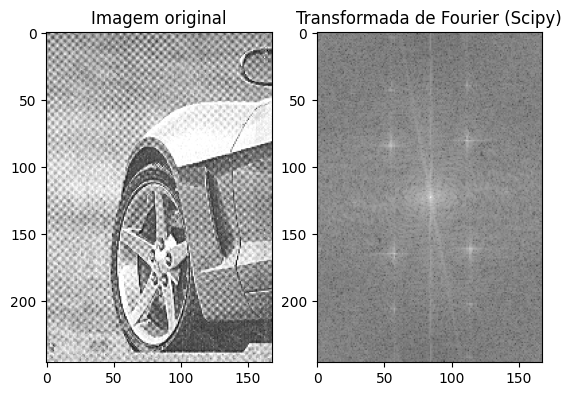

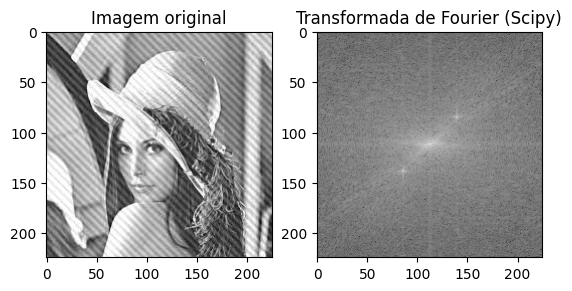

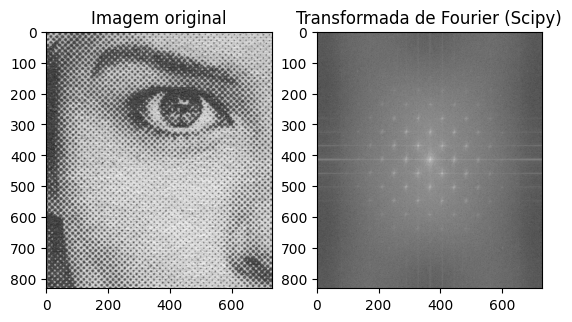

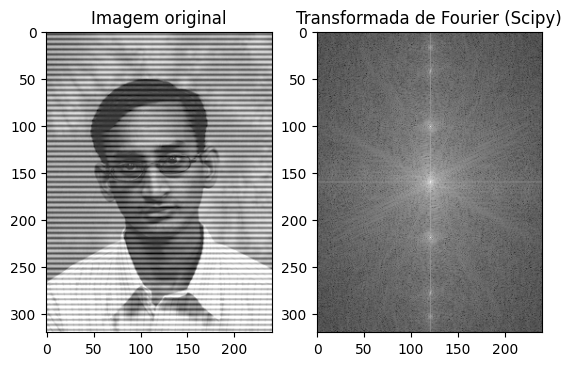

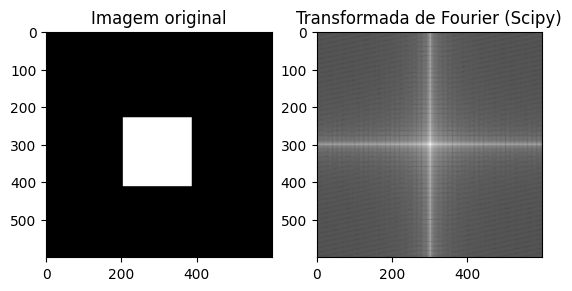

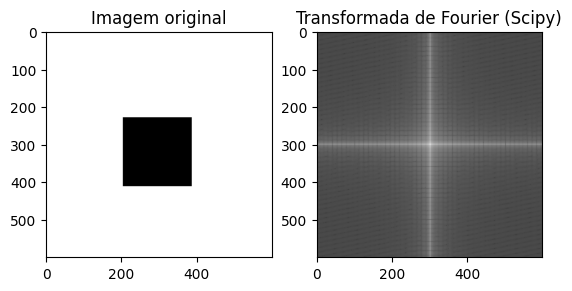

In [109]:
for img in images:
  imgNew = transfFourierScipy(img ,False)
  plot(img, imgNew, TITULO, "Transformada de Fourier (Scipy)")

###Implementar a Transformada Inversa de Fourier (Utilize a biblioteca de sua preferência)

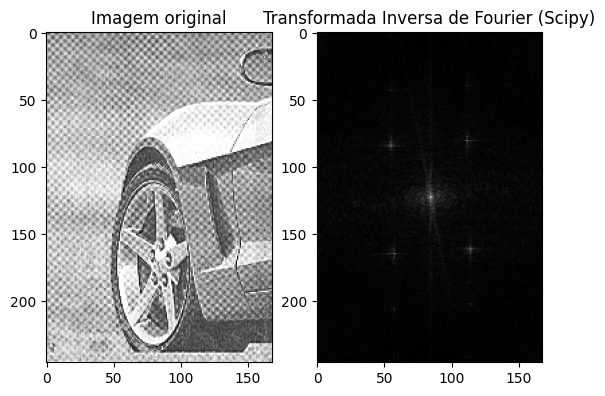

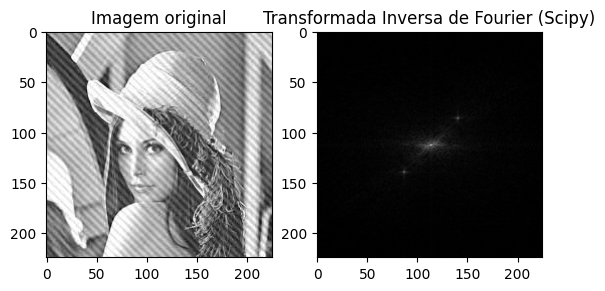

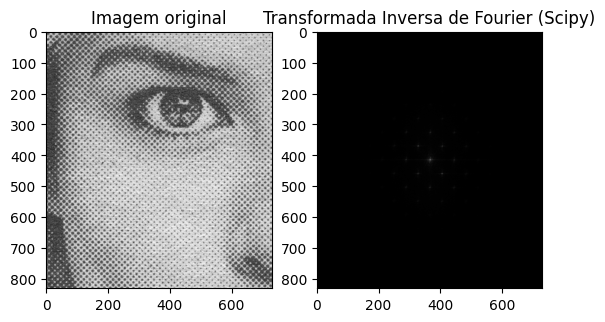

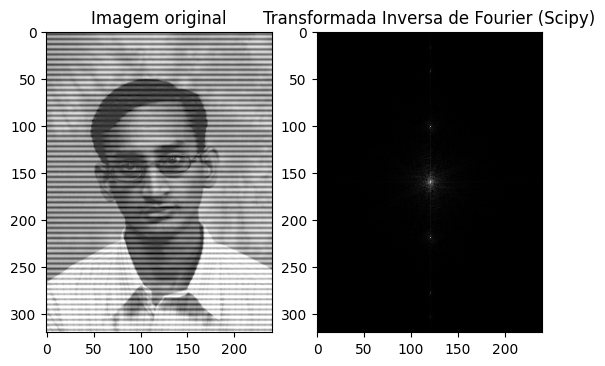

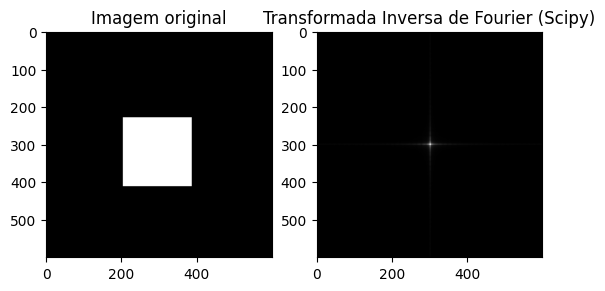

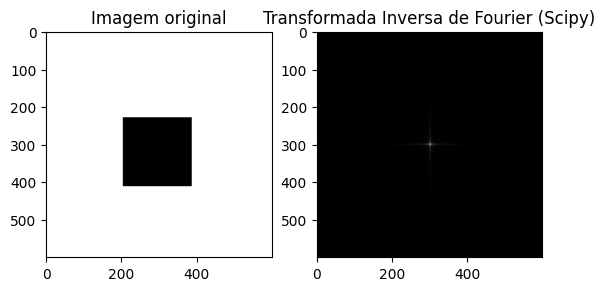

In [110]:
#Implementada em transformada
for img in images:
  imgNew = transfFourierScipy(img ,True)
  plot(img, imgNew, TITULO, "Transformada Inversa de Fourier (Scipy)")


###Plotar o espectro e fase.

In [111]:
def transfFaseScipy(img):
  #Converte e copia imagem para uma matriz Numpy
  npImage = np.array(img)

  transf = transformada(npImage, False)#False ou True geram resultados iguais
  fase_spec = np.angle(transf)
  fase_spec = (fase_spec - fase_spec.min()) / (fase_spec.max() - fase_spec.min())

  fase_spec *= 255
  fase_spec.astype(np.uint8)
  image_out = Image.fromarray(fase_spec)
  return image_out

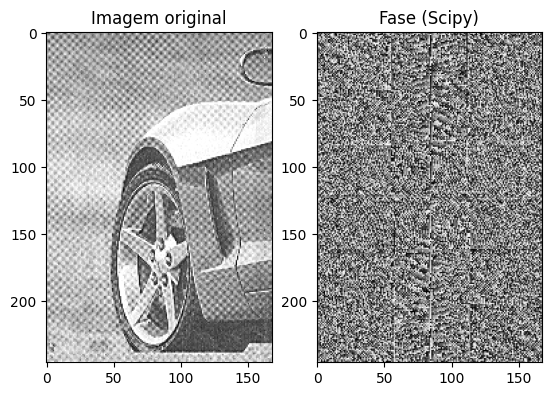

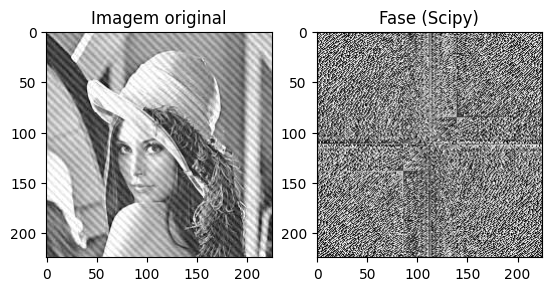

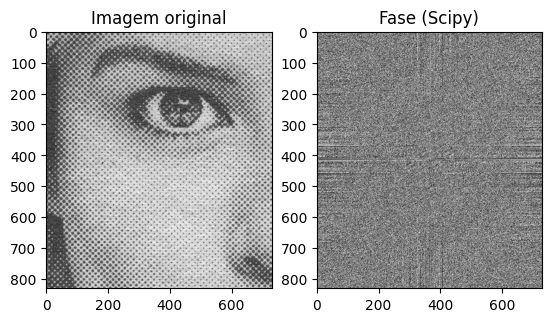

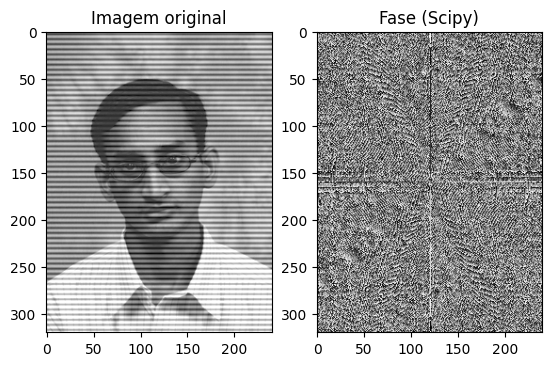

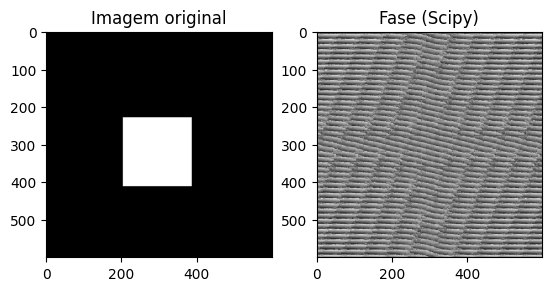

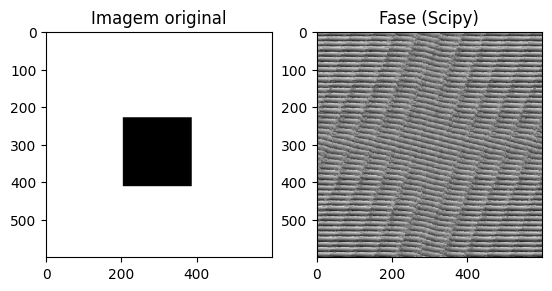

In [112]:
for img in images:
  imgNew = transfFaseScipy(img)
  plot(img, imgNew, TITULO, "Fase (Scipy)")

###Comparar os resultados com ImageJ.

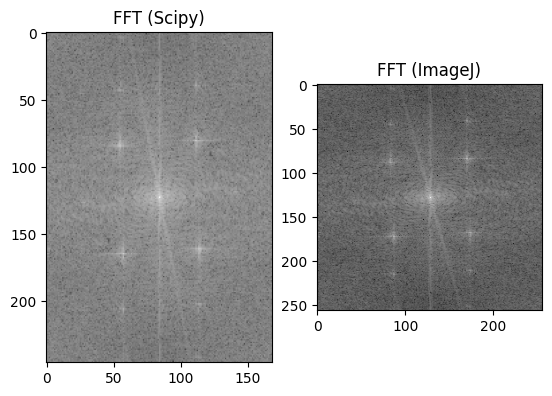

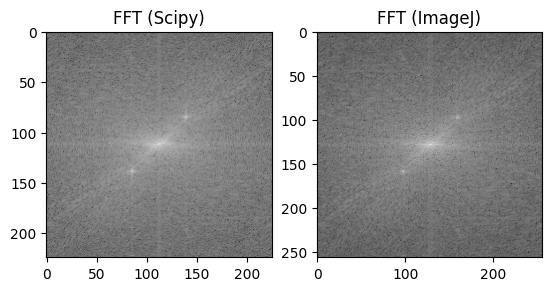

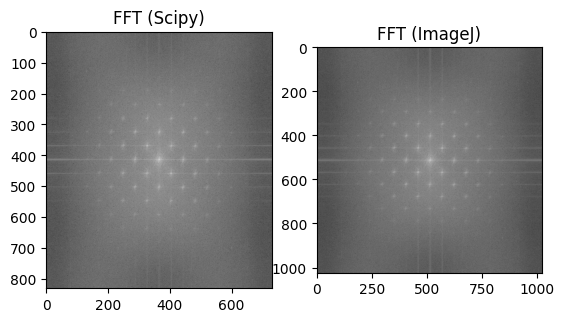

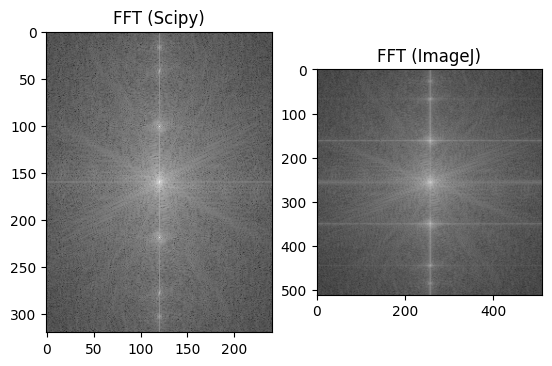

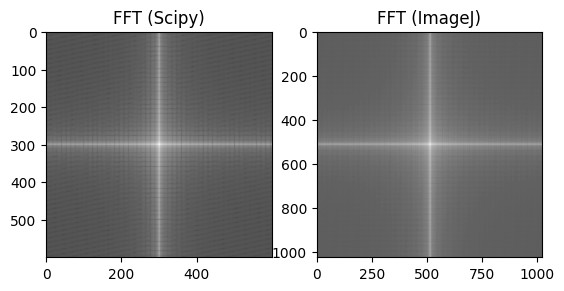

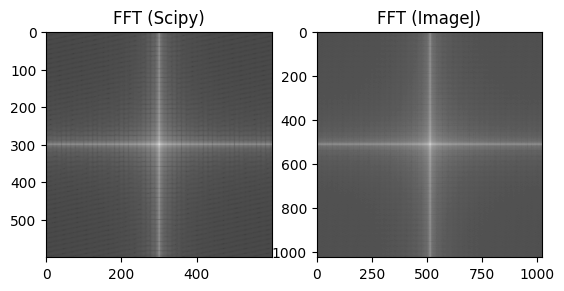

In [113]:
i = 0
for img in images:
  imgNew = transfFourierScipy(img ,False)
  plot(imgNew, imagesFFT[i], "FFT (Scipy)", "FFT (ImageJ)")
  i += 1

###Plotar o espectro 3D (Pesquisar formas de visualização 3D em Python)




In [114]:
def transfFourier3DScipy(img):
  npImage = np.array(img)
  transf = transformada(img, False)

  magnitude_spectrum = np.abs(transf)

  # Plot 3D
  height, width = npImage.shape
  x = np.linspace(-width // 2, width // 2, width)
  y = np.linspace(-height // 2, height // 2, height)
  X, Y = np.meshgrid(x, y)
  Z = np.log(magnitude_spectrum + 1)

  return X, Y, Z

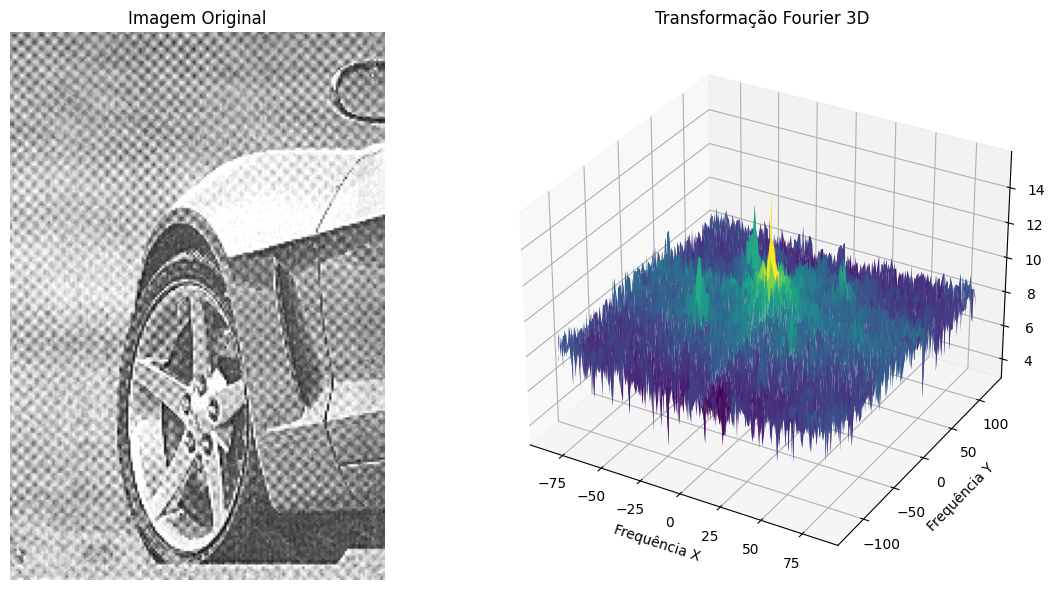

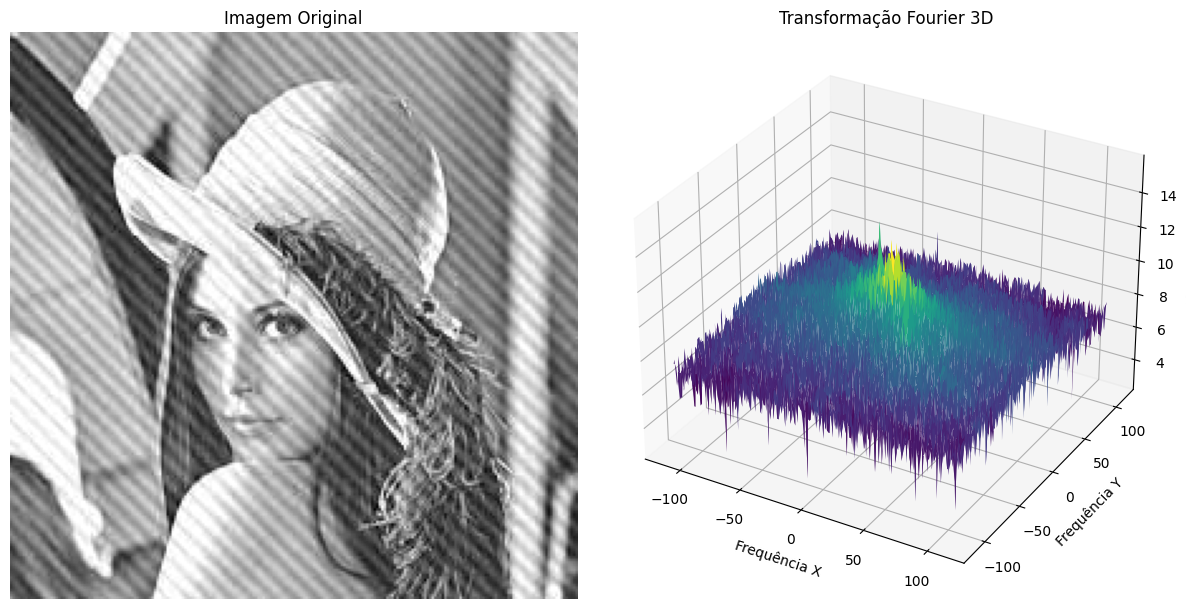

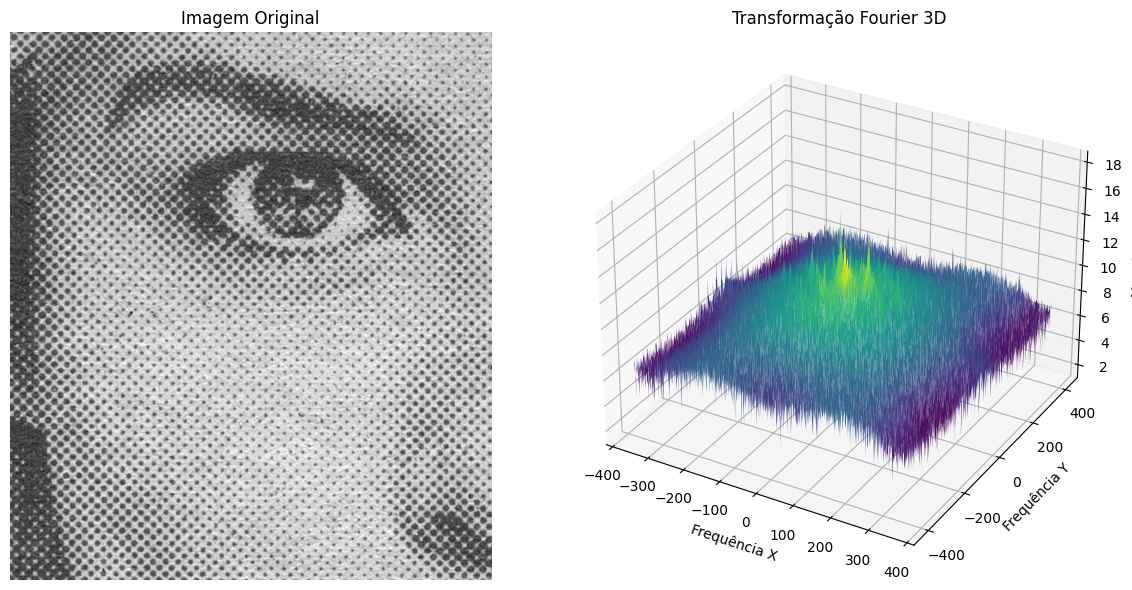

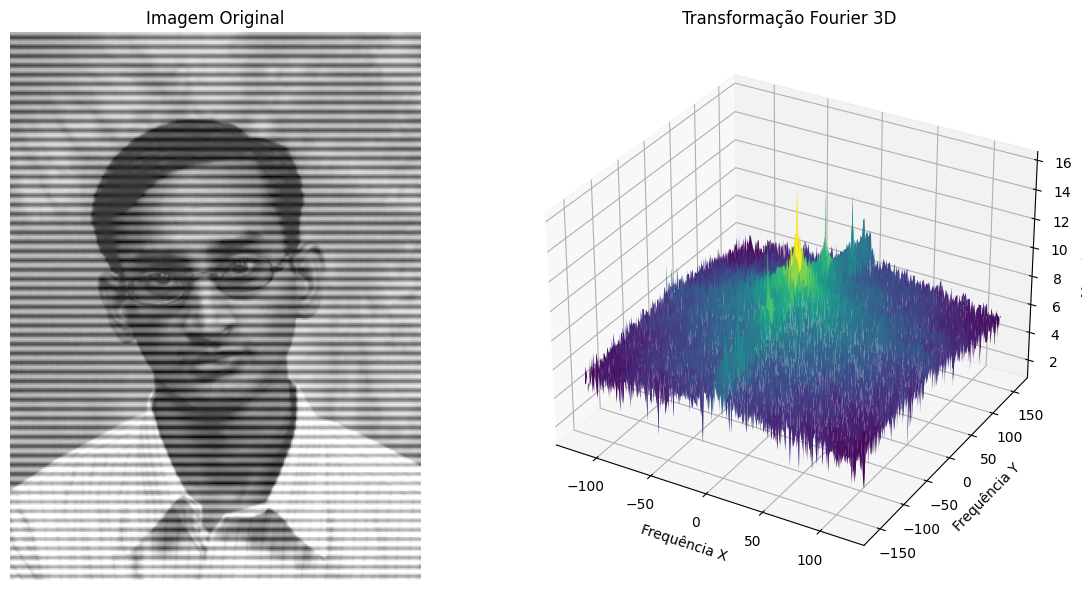

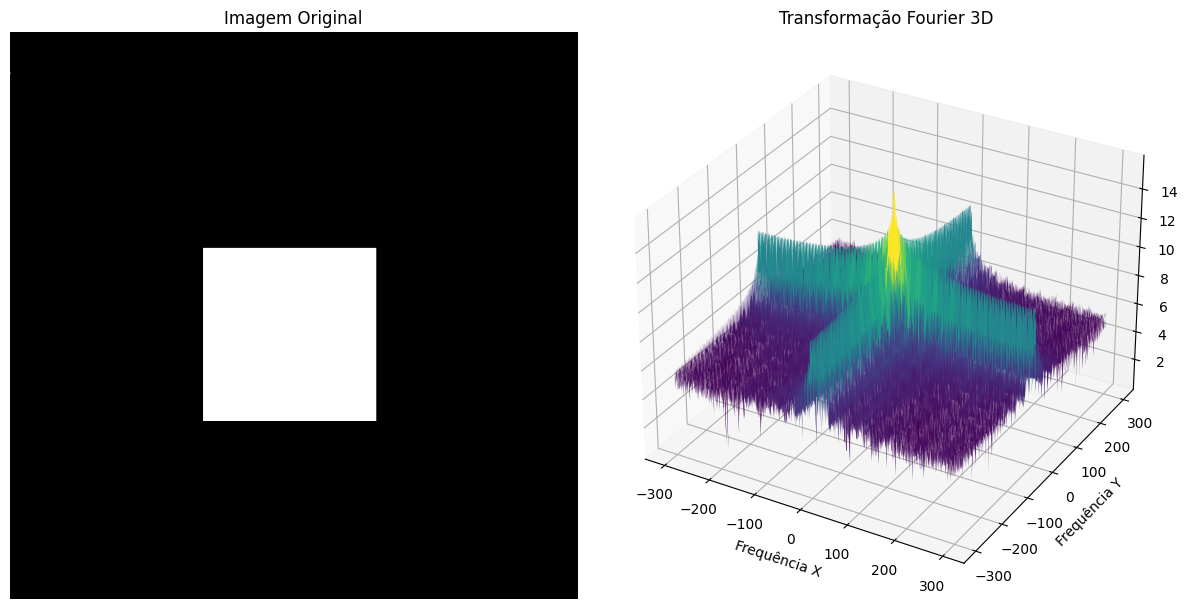

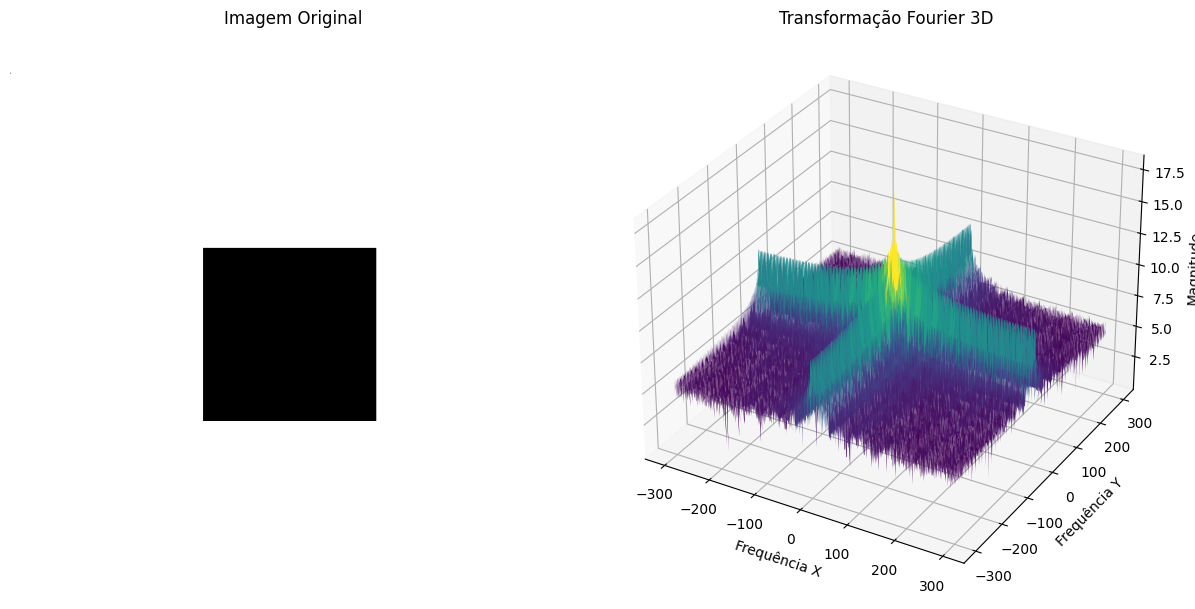

In [115]:
for img in images:
  X, Y, Z = transfFourier3DScipy(img)
  plot3D(img, X, Y, Z)